In [1]:
# Importing library's that will be used
import pandas as pd
import requests
import io
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

## Intro

#### Project Goal
* In this Project on the basis of the mobile specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc I will be predicting the Price range of the mobile
* As this open programme will focus on the prediction/machine learning part mostly, I won't go to far into data analysis or cleaning

#### Data sourcing
* id: ID
* battery_power: Total energy a battery can store in one time measured in mAh
* blue: Has bluetooth or not
* clock_speed: speed at which microprocessor executes instructions
* dual_sim: Has dual sim support or not
* fc: Front Camera mega pixels
* four_g: Has 4G or not
* int_memory: Internal Memory in Gigabytes
* m_dep: Mobile Depth in cm
* mobile_wt: Weight of mobile phone
* n_cores: Number of cores of processor
* pc:Primary Camera mega pixels
* px_height: Pixel Resolution Height
* px_width: Pixel Resolution Width
* ram: Random Access Memory in Megabytes
* sc_h: Screen Height of mobile in cm
* sc_w: Screen Width of mobile in cm
* talk_time: longest time that a single battery charge will last when you are
* three_g: Has 3G or not
* touch_screen: Has touch screen or not
* wifi: Has wifi or not
* price_range: from 0 to 3 where 0 = low cost and 3 = very high cost

## Loading data

In [2]:
# Importing the train dataset
TrainDataUrl = "https://raw.githubusercontent.com/Dipsaus2002/open-programme-ES/main/Data/train.csv"
TrainDataContent = requests.get(TrainDataUrl).content
TrainDataset = pd.read_csv(io.StringIO(TrainDataContent.decode('utf-8')))

# Importing the test dataset
TestDataUrl = "https://raw.githubusercontent.com/Dipsaus2002/open-programme-ES/main/Data/test.csv"
TestDataContent = requests.get(TestDataUrl).content
TestDataset = pd.read_csv(io.StringIO(TestDataContent.decode('utf-8')))

In [3]:
TrainDataset.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
TestDataset.head(5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


## Data analysis

Just a quick look if all data is usable and some other useful info. For now i will do this for train data only as both datasets are similar.

In [5]:
# Getting some overal info from each column
TrainDataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
# Getting the type and other info about the values of columns
TrainDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

From the above info I can gather that there are no null values which means I don't have to drop any rows.

## Data understanding
For this I will only look at the data that correlates the most with the feature Price. To find out what correlates the most i will first make a heatmap.

<AxesSubplot:>

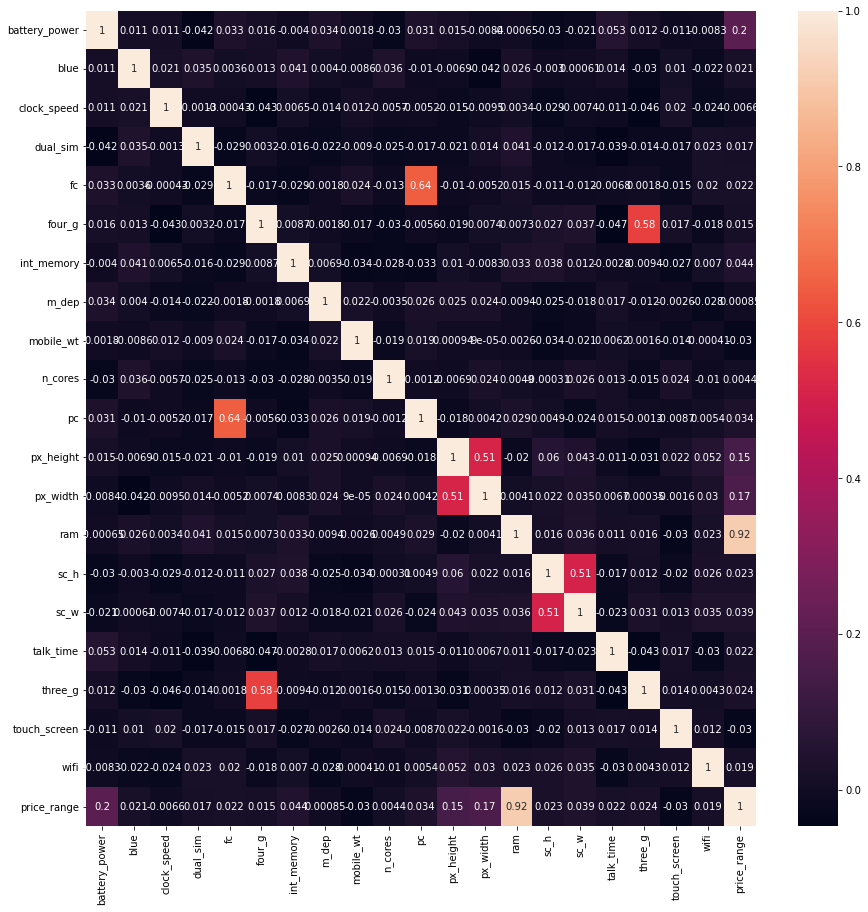

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(TrainDataset.corr(),annot=True)

From this heatmap we can gather that ram has a very high correlation with the price range and I will use this for the prediction

## Data preparation
I will now prepare the data by splitting it into training data and testing data by using train_test_split from seaborn

In [8]:
# Creating the X and y array
X=TrainDataset.drop('price_range',axis=1)
y=TrainDataset['price_range']

# Splitting the data into test and training data using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Modeling
For modeling I will use the models:
* Logistic Regression
* k-Nearest Neighbors
* Decision Trees

I chose these models because they are one of the most used models for classification. 

In [9]:
# Importing all the models that will be used
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### Creating & Training Linear Regression Model

In [10]:
# Creating the model
lm = LinearRegression()

# Fitting the data into the model
lm.fit(X_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Printing the prediction score of the model
lm.score(X_test,y_test)

0.9132801488185276

While this is a good prediction score I first want to see if other models have beter results

### Creating & Training KNN Model

In [11]:
# Creating the KNN model
knn = KNeighborsClassifier(n_neighbors=10)

# fitting the train and test data into the model
knn.fit(X_train,y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

# Printing the prediction score of the model
knn.score(X_test,y_test)

0.9212121212121213

### Creating & Training Decision tree model

In [12]:
# Creating the model
dtree = DecisionTreeClassifier()

# Fitting the model
dtree.fit(X_train,y_train)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best')

# Printing the score of the model
dtree.score(X_test,y_test)

0.8242424242424242

## Conclusion
From the models above we can see that KNN and Linear Regression Model are the best

### KNN prediction result
Now using a confusion metrix we can see how well it predicts the price_range

In [13]:
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)

matrix=confusion_matrix(y_test,pred)
print(matrix)

[[157   1   0   0]
 [  6 143   3   0]
 [  0  20 169  10]
 [  0   0  12 139]]


To better show the confusion matrix I will make it into a heatmap using 

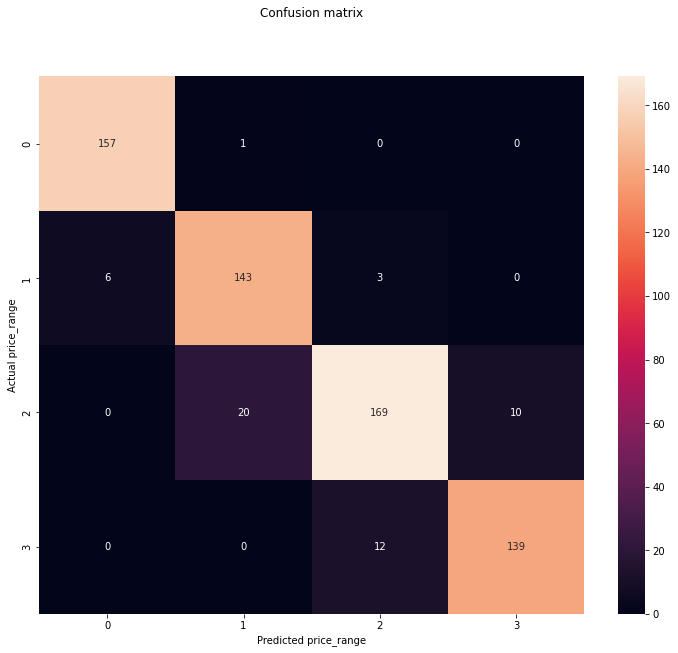

In [23]:
mpl.rcParams['figure.figsize']=(10,8)
class_names=[0,1] # Name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(matrix), annot=True,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual price_range')
plt.xlabel('Predicted price_range')
plt.show()